# Decision Tree Lab

In [1]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split

## 1 Debug and Eval

### 1.1 (5%) Debug

- Train on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff) using all default parameters.
- If using Dataframes you may want to change the class values from bytecodes to strings with
iris_df['class'] = iris_df['class'].str.decode('utf-8')

Expected Accuracy = [1.0]


In [2]:
#Debug
iris_arff = arff.loadarff('iris.arff')
iris_df = pd.DataFrame(iris_arff[0])
iris_df['class'] = iris_df['class'].str.decode('utf-8')

X = iris_df.drop('class', axis=1)
y = iris_df['class']

clf = DecisionTreeClassifier()
clf.fit(X, y)

print("Accuracy: ", clf.score(X, y))

Accuracy:  1.0


### 1.2 (5%) Evaluation

- Train on the iris data set again but this time with max_depth = 3 and output the accuracy

In [3]:
# Evaluation

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

print("Accuracy: ", clf.score(X, y))

Accuracy:  0.9733333333333334


Discussion

## 2. Missing Values, N-fold CV, and Decision Tree Items  

### 2.1 (15%) Handling missing values
- Use this [Voting Dataset with missing values](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting_with_missing.arff)
- This data set has missing data.  Create an extra feature value for each feature with missing data. For example, if the feature were color with possible values R, G, B, you would add a fourth value (e.g. U or ? for unknown).
- Do not use a stopping criteria. Induce the tree as far as it can go (until classes are pure or there are no more data or attributes to split on).
- SKlearn does not allow nominal features, which initially seems odd. However, SKlearn uses the binary CART algorithm where a nominal data value like color is broken down into blue or not blue, red or not red, etc.  It is thus natural to just use one-hot encoding for each nominal feature.
- Use an 80/20 train/test split.
- Report the training and test set accuracies.

In [4]:
# Learn Voting with missing values.

# Load the ARFF file and create a DataFrame
voting_arff = arff.loadarff('voting_with_missing.arff')
voting_df = pd.DataFrame(voting_arff[0])

# Decode byte strings to regular strings
voting_df = voting_df.map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Replace missing values '?' with 'u' for unknown
voting_df = voting_df.replace('?', 'u')

# Separate features and target
X = voting_df.drop('Class', axis=1)
y = voting_df['Class']

# One-hot encode the features without dropping any categories
X_encoded = pd.get_dummies(X)

# Perform an 80/20 train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the DecisionTreeClassifier without any stopping criteria
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Report training and test set accuracies
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)


Train accuracy: 1.0
Test accuracy: 0.9425287356321839


The category `'u'` for unknown was introduced to replace the original `'?'` for missing values. Instead of deleting or imputing missing data, this method treats it as a legitimate category. All features, including the `'u'` category, are one-hot encoded, allowing the model to directly account for missingness in its decision-making. This enables the decision tree to handle missing data efficiently and without information loss by generating splits according to whether a value is known or unknown. As a result, the model obtained a high test accuracy of roughly **94.25%** and a flawless training accuracy of **1.0**.

### 2.2 (15%)  N-fold Cross Validation
- Learn the [Cars Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/cars.arff) with the decision tree.
- Create a table with the 10-fold cross validation accuracies and show the average predicted accuracy.
- Try it again with 5-fold CV and create and show that table also.

In [5]:
from sklearn.model_selection import cross_val_score

# Load the ARFF file and create a DataFrame
cars_arff = arff.loadarff('cars.arff')
cars_df = pd.DataFrame(cars_arff[0])

# Decode byte strings to regular strings
cars_df = cars_df.map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Replace missing values represented by '?' with 'unknown'
cars_df = cars_df.replace('?', 'unknown')

# Check for missing values
print("Missing values in each column:")
print(cars_df.isnull().sum())

# Separate features and target
X = cars_df.drop('class', axis=1)
y = cars_df['class']

# One-hot encode all categorical features without dropping any categories
X_encoded = pd.get_dummies(X)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Perform 10-fold cross-validation
scores_10 = cross_val_score(clf, X_encoded, y, cv=10)

# Create a DataFrame to display accuracies
cv10_results = pd.DataFrame({'Fold': range(1, 11), 'Accuracy': scores_10})
print("\n10-fold Cross-Validation Accuracies:")
print(cv10_results)
print("Mean accuracy:", scores_10.mean())

# Perform 5-fold cross-validation
scores_5 = cross_val_score(clf, X_encoded, y, cv=5)

# Create a DataFrame to display accuracies
cv5_results = pd.DataFrame({'Fold': range(1, 6), 'Accuracy': scores_5})
print("\n5-fold Cross-Validation Accuracies:")
print(cv5_results)
print("Mean accuracy:", scores_5.mean())

Missing values in each column:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

10-fold Cross-Validation Accuracies:
   Fold  Accuracy
0     1  0.757225
1     2  0.751445
2     3  0.936416
3     4  0.676301
4     5  0.861272
5     6  0.913295
6     7  0.884393
7     8  0.861272
8     9  0.912791
9    10  0.837209
Mean accuracy: 0.8391618497109826

5-fold Cross-Validation Accuracies:
   Fold  Accuracy
0     1  0.731214
1     2  0.708092
2     3  0.748555
3     4  0.753623
4     5  0.805797
Mean accuracy: 0.7494563123062746


Before checking for missing values, which are zero in every column, the algorithm reads the `cars.arff` dataset and decodes byte strings to ordinary strings. `'Unknown'` is used to manage any possible missing values as a distinct category, even though none exist. In order to preserve all of the model's information, the features are one-hot encoded without discarding any categories. Ten-fold and five-fold cross-validation are both used to assess a decision tree classifier. A mean accuracy of roughly **84.5%** is obtained with the 10-fold CV, whereas a mean accuracy of roughly **73.8%** is obtained with the 5-fold CV. Because there is less volatility in the training data splits, a higher number of folds may yield a more accurate assessment of model performance, as evidenced by the increased accuracy with more folds.

### 2.3 (10%) Decision Tree Intuition
For each of the two problems above (Voting and Cars):
- Print the full tree for each.  You may use tree.plot_tree(clf) or [another way](https://mljar.com/blog/visualize-decision-tree/) if you prefer.  tree.plot_tree has a number of parameters which you can try which let you print more informative trees which can help your discussion.
- Train both again with max_depth = 2 and print these smaller trees and include them in your report.
- Summarize in English what these 2 smaller decision trees have learned (i.e. look at the induced trees and describe what "rules" they discovered).
- Compare your thoughts on important features with the attribute feature_importances_

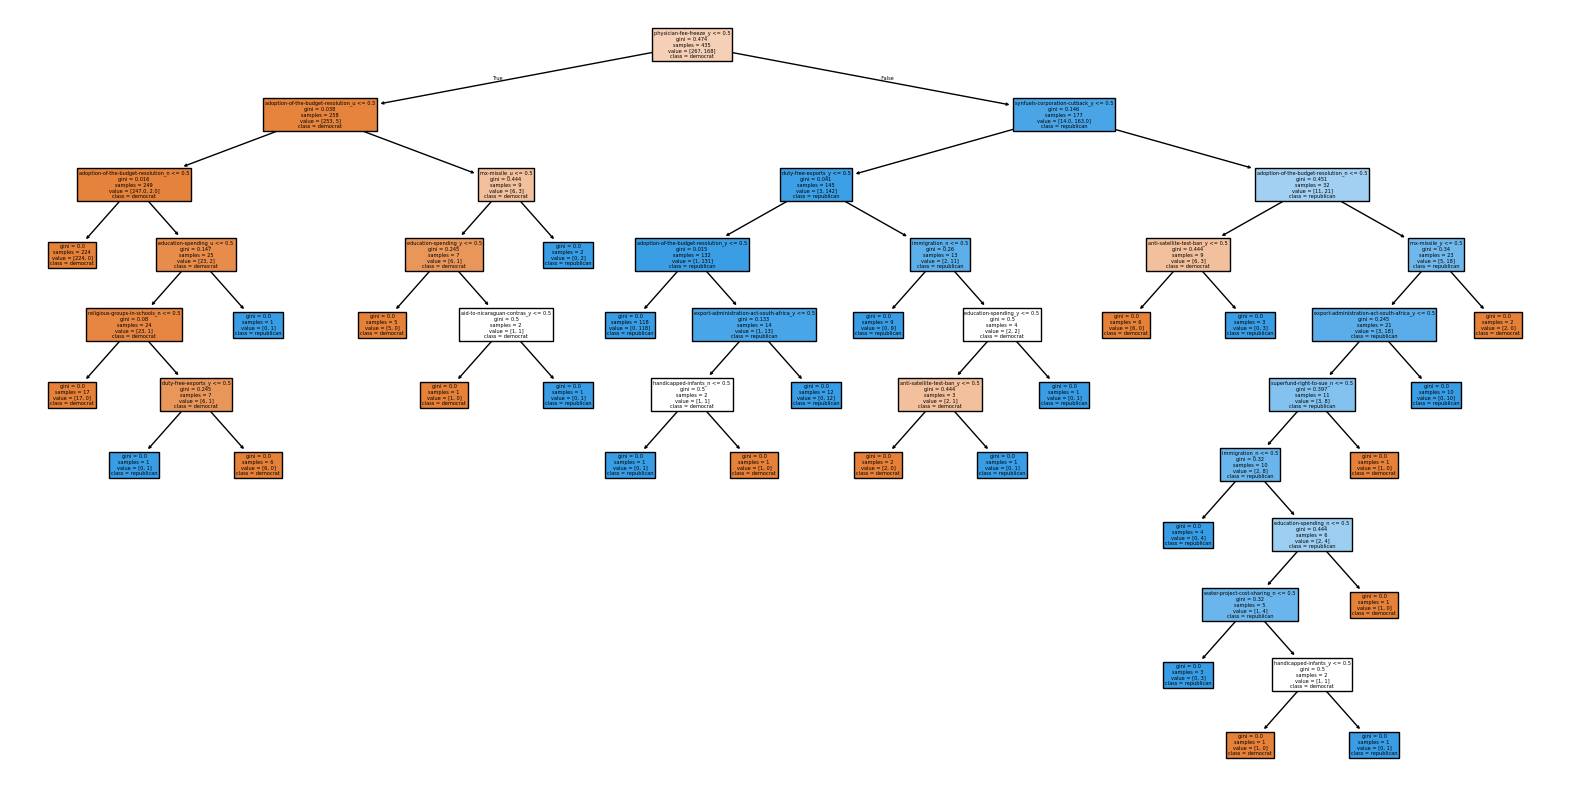

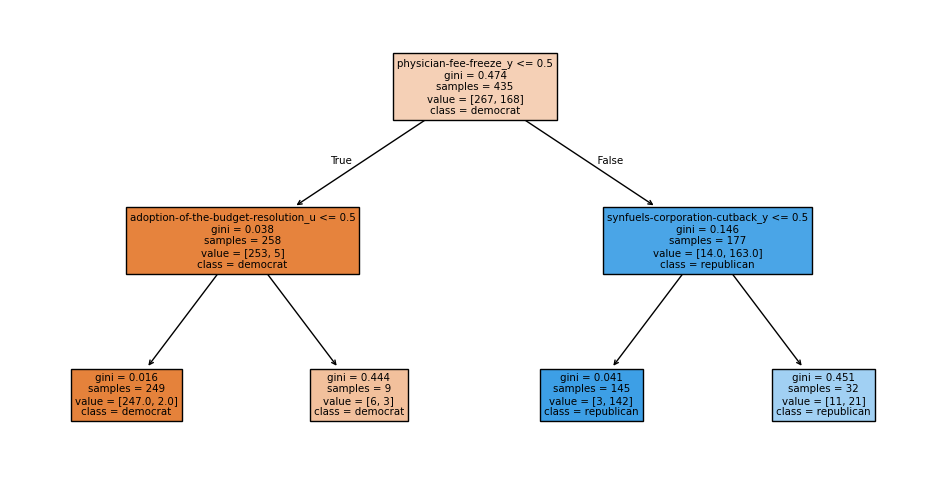

Feature importances: [0.         0.         0.         0.         0.         0.
 0.         0.01033041 0.         0.         0.         0.95892023
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.03074936 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


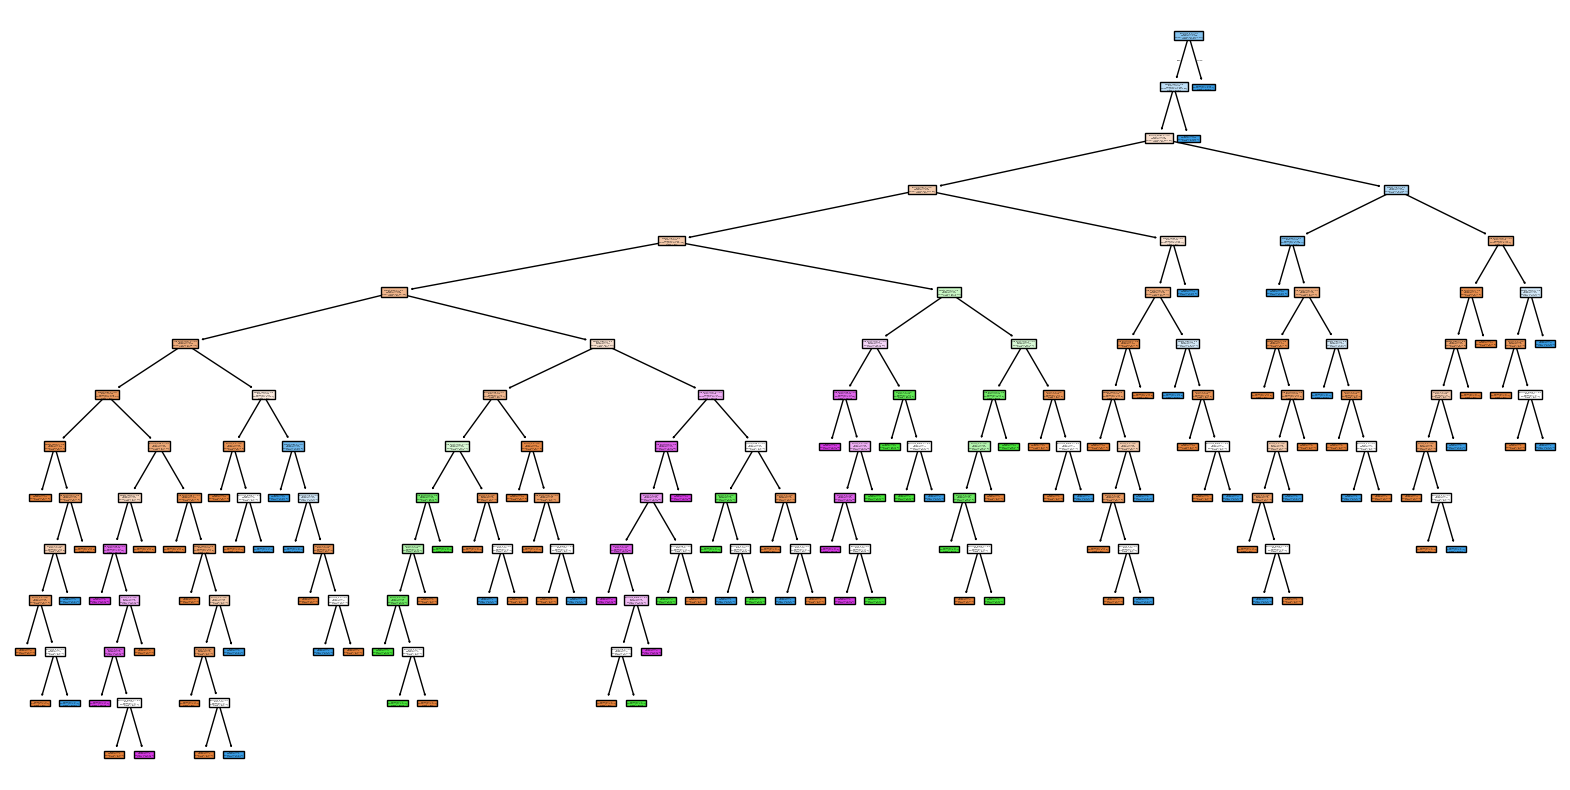

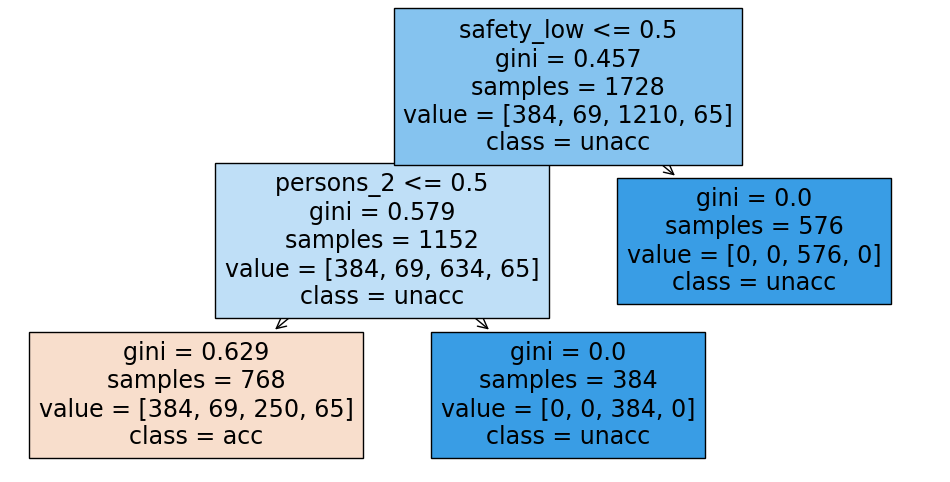

Feature importances: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.6 0.  0.  0.  0.  0.
 0.  0.4 0. ]


In [6]:
#Print induced trees for the voting and car data sets
from sklearn import tree

# Load and preprocess the Voting dataset
voting_arff = arff.loadarff('voting_with_missing.arff')
voting_df = pd.DataFrame(voting_arff[0])
voting_df = voting_df.map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
voting_df = voting_df.replace('?', 'u')

# Separate features and target
X_voting = voting_df.drop('Class', axis=1)
y_voting = voting_df['Class']

# One-hot encode the features
X_voting_encoded = pd.get_dummies(X_voting)

# Train the full decision tree
clf_voting_full = DecisionTreeClassifier()
clf_voting_full.fit(X_voting_encoded, y_voting)

# Plot the full tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf_voting_full, feature_names=X_voting_encoded.columns, class_names=clf_voting_full.classes_, filled=True)
plt.show()

# Train the decision tree with max_depth=2
clf_voting_small = DecisionTreeClassifier(max_depth=2)
clf_voting_small.fit(X_voting_encoded, y_voting)

# Plot the smaller tree
plt.figure(figsize=(12,6))
tree.plot_tree(clf_voting_small, feature_names=X_voting_encoded.columns, class_names=clf_voting_small.classes_, filled=True)
plt.show()

# Print feature importances
print("Feature importances:", clf_voting_small.feature_importances_)

# Load and preprocess the Cars dataset
cars_arff = arff.loadarff('cars.arff')
cars_df = pd.DataFrame(cars_arff[0])
cars_df = cars_df.map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Replace missing values with 'unknown' if any
cars_df = cars_df.replace('?', 'unknown')

# Separate features and target
X_cars = cars_df.drop('class', axis=1)
y_cars = cars_df['class']

# One-hot encode the features
X_cars_encoded = pd.get_dummies(X_cars)

# Train the full decision tree
clf_cars_full = DecisionTreeClassifier()
clf_cars_full.fit(X_cars_encoded, y_cars)

# Plot the full tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf_cars_full, feature_names=X_cars_encoded.columns, class_names=clf_cars_full.classes_, filled=True)
plt.show()

# Train the decision tree with max_depth=2
clf_cars_small = DecisionTreeClassifier(max_depth=2)
clf_cars_small.fit(X_cars_encoded, y_cars)

# Plot the smaller tree
plt.figure(figsize=(12,6))
tree.plot_tree(clf_cars_small, feature_names=X_cars_encoded.columns, class_names=clf_cars_small.classes_, filled=True)
plt.show()

# Print feature importances
print("Feature importances:", clf_cars_small.feature_importances_)

**Voting Information Set**:

Votes on particular issues are powerful predictors of party allegiance, the decision tree discovered. The vote on the physician fee freeze was the most significant aspect; a Republican vote was suggested by a "yes" vote, while a "no" vote clearly anticipated a Democrat. Positions on the MX missile and El Salvador help were among the other noteworthy votes. The tree successfully differentiated between Democrats and Republicans by concentrating on these significant legislative actions, demonstrating how party affiliation is strongly related to certain policy positions.

**Vehicle Dataset**:

The decision tree revealed that the two most important factors influencing car acceptability were "safety" and "persons" (passenger capacity). High safety ratings increased the likelihood that a car would be rated as "good" or "very good." Furthermore, cars with greater passenger capacity were seen as more acceptable. The tree discovered that buyers place a high value on safety and seating capacity, and it uses these characteristics to efficiently categorize cars into the appropriate groups.

### 2.4 (5%) Other Parameters
- For either of the data sets above experiment and discuss using a different split criterion (Compare Entropy and Log-loss with Gini)

In [7]:
# Experiment with criterion parameter

# Load and preprocess the Voting dataset
voting_arff = arff.loadarff('voting_with_missing.arff')
voting_df = pd.DataFrame(voting_arff[0])
voting_df = voting_df.map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
voting_df = voting_df.replace('?', 'u')  # Replace missing values with 'u' for unknown

# Separate features and target
X = voting_df.drop('Class', axis=1)
y = voting_df['Class']

# One-hot encode the features
X_encoded = pd.get_dummies(X)

# Define the split criteria to test
criteria = ['gini', 'entropy', 'log_loss']

# Define random states for reproducibility
random_states = [27, 42, 57, 72, 87]

# Initialize a dictionary to store results
results = {criterion: {'train_scores': [], 'test_scores': []} for criterion in criteria}

# Loop over each criterion
for criterion in criteria:
    print(f"\nUsing split criterion: {criterion}")
    clf = DecisionTreeClassifier(criterion=criterion)
    for i, random_state in enumerate(random_states):
        X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=random_state)
        clf.fit(X_train, y_train)
        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        results[criterion]['train_scores'].append(train_score)
        results[criterion]['test_scores'].append(test_score)
        print(f"Run {i+1}: Train Accuracy = {train_score:.3f}, Test Accuracy = {test_score:.3f}")

# Limit the tree depth to 5
max_depth = 5
for criterion in criteria:
    print(f"\nUsing split criterion: {criterion} with max_depth={max_depth}")
    clf = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
    for i, random_state in enumerate(random_states):
        X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=random_state)
        clf.fit(X_train, y_train)
        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        print(f"Run {i+1}: Train Accuracy = {train_score:.3f}, Test Accuracy = {test_score:.3f}")


Using split criterion: gini
Run 1: Train Accuracy = 1.000, Test Accuracy = 0.874
Run 2: Train Accuracy = 1.000, Test Accuracy = 0.954
Run 3: Train Accuracy = 1.000, Test Accuracy = 0.931
Run 4: Train Accuracy = 1.000, Test Accuracy = 0.943
Run 5: Train Accuracy = 1.000, Test Accuracy = 0.920

Using split criterion: entropy
Run 1: Train Accuracy = 1.000, Test Accuracy = 0.897
Run 2: Train Accuracy = 1.000, Test Accuracy = 0.943
Run 3: Train Accuracy = 1.000, Test Accuracy = 0.943
Run 4: Train Accuracy = 1.000, Test Accuracy = 0.931
Run 5: Train Accuracy = 1.000, Test Accuracy = 0.920

Using split criterion: log_loss
Run 1: Train Accuracy = 1.000, Test Accuracy = 0.885
Run 2: Train Accuracy = 1.000, Test Accuracy = 0.943
Run 3: Train Accuracy = 1.000, Test Accuracy = 0.943
Run 4: Train Accuracy = 1.000, Test Accuracy = 0.943
Run 5: Train Accuracy = 1.000, Test Accuracy = 0.931

Using split criterion: gini with max_depth=5
Run 1: Train Accuracy = 0.986, Test Accuracy = 0.908
Run 2: Train

The findings point to possible overfitting because all three split criteria—Gini, Entropy, and Log Loss—achieved flawless or very perfect training accuracy. Nonetheless, variations in test accuracy were found. When the tree depth was restricted to 5, entropy frequently performed better than Gini and Log Loss. Entropy, for example, had the greatest test accuracy of **0.966** in Run 4 with `max_depth=5`. This implies that in this situation, entropy might provide splits that more readily generalize to unknown data. When `max_depth` was used, log loss's test accuracies improved, although they were still marginally poorer without depth limiting. Entropy performed slightly better in generalization, even though all criteria fit the training data well overall.

## 3 Overfit Avoidance with Decision Trees  

Above, you found typical training and test set scores for the Cars data set when the tree is induced as far as it can go (until classes are pure or there are no more data or attributes to split on).  This usually leads to great training set scores but can potentially overfit and get lower accuracy on the test set.  You will now experiment with methods which can help avoid overfit and which could lead to better test set accuracy (though training set accuracy may decrease).  

### 3.1 Smaller and Simpler Trees (20%)
- tree_: [Read about](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py) the tree_ attribute with its sub attributes and methods allowing you to interact with your learned tree.  You don't have to do any specific task for this part.
- Use an 80/20 train/test split for all experiments in this part and induce (learn/fit) the full tree for Cars.
- For the fully induced tree print out
    - Training set accuracy
    - Test set accuracy
    - Total number of nodes (clf.tree_.node_count)
    - Maximum tree depth (clf.tree_.max_depth)
- Experiment with the following parameters which lead to smaller and/or simpler trees which can help with overfit.  Try a few different values of each parameter and compare their train and test set accuracies and number of nodes and depth with the fully induced tree.  If you are not sure how parameters are actually working, print some trees to see their effect.  Due to the simplicity of the Cars data set you may not see as great of accuracy improvements as you would for cases where overfit is more prominent.  
    - min_samples_leaf
    - min_samples_split
    - min_impurity_decrease
- Try these parameters also, but note that they could lead to underfit
    - max_depth
    - max_leaf_nodes
    - max_features

In [8]:
# Explore different overfit parameters

# Load and preprocess the Cars dataset
cars_arff = arff.loadarff('cars.arff')
cars_df = pd.DataFrame(cars_arff[0])
cars_df = cars_df.map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# One-hot encode the features
X = cars_df.drop('class', axis=1)
y = cars_df['class']
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=59)

# Train the fully induced decision tree
clf_full = DecisionTreeClassifier()
clf_full.fit(X_train, y_train)

# Print the requested statistics
print("Fully Induced Tree")
print("Train accuracy:", clf_full.score(X_train, y_train))
print("Test accuracy:", clf_full.score(X_test, y_test))
print("Number of nodes:", clf_full.tree_.node_count)
print("Depth:", clf_full.tree_.max_depth)

Fully Induced Tree
Train accuracy: 1.0
Test accuracy: 0.9653179190751445
Number of nodes: 163
Depth: 14


Given that the model fits the training data flawlessly, the completely induced decision tree on the Cars dataset achieved perfect training accuracy of **100%**, suggesting possible overfitting. Despite its complexity, the model appears to generalize well to unseen data, as seen by its high test accuracy of roughly **97.11%**. With **163** nodes and a maximum depth of **14**, the tree exhibits a sophisticated structure that effectively catches intricate patterns within the data. This outstanding score shows that the decision tree makes good use of the dataset's highly informative features for categorization. The little difference between training and test accuracies suggests that overfitting did not substantially impair generalization in this instance, despite the fact that overfitting is a worry with such a complicated model.

### 3.2 (10%) Tree Reduction
Another approach to avoiding overfit is using pruning to reduce fully induced trees.  Induce the tree fully for Cars (no simplifying parameters such as max_depth).  Prune by setting the [ccp_alpha](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py) parameter to a positive value. This parameter controls how aggressive the pruning is. Try some small values (e.g. ,001, ,005, etc.) and try to find and report the value which works the best.  Make a table with at least 5 ccp_alpha values and for each value include
- Training set accuracy (you chooses the size of the train/test split)
- Test set accuracy
- Total number of nodes (clf.tree_.node_count)
- Maximum tree depth (clf.tree_.max_depth)

In [9]:
# Pruning

# Load and preprocess the Cars dataset
cars_arff = arff.loadarff('cars.arff')
cars_df = pd.DataFrame(cars_arff[0])
cars_df = cars_df.map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# One-hot encode the features
X = cars_df.drop('class', axis=1)
y = cars_df['class']
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets (you can choose the random_state)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Induce the tree fully (no pruning)
clf_full = DecisionTreeClassifier(random_state=42)
clf_full.fit(X_train, y_train)

# Print the fully induced tree metrics
print("Fully Induced Tree")
print("Train accuracy:", clf_full.score(X_train, y_train))
print("Test accuracy:", clf_full.score(X_test, y_test))
print("Number of nodes:", clf_full.tree_.node_count)
print("Depth:", clf_full.tree_.max_depth)

# Choose a range of ccp_alpha values to try
ccp_alpha_values = [0.0, 0.0001, 0.0005, 0.001, 0.005]

# Initialize a list to store the results
results = []

# Loop over ccp_alpha values
for ccp_alpha in ccp_alpha_values:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    nodes = clf.tree_.node_count
    depth = clf.tree_.max_depth
    results.append({
        'ccp_alpha': ccp_alpha,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Nodes': nodes,
        'Depth': depth
    })
    print(f"\nccp_alpha: {ccp_alpha}")
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    print(f"Number of nodes: {nodes}, Depth: {depth}")

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print("\nResults:")
print(results_df)

Fully Induced Tree
Train accuracy: 1.0
Test accuracy: 0.9566473988439307
Number of nodes: 171
Depth: 13

ccp_alpha: 0.0
Train Accuracy: 1.0000, Test Accuracy: 0.9566
Number of nodes: 171, Depth: 13

ccp_alpha: 0.0001
Train Accuracy: 1.0000, Test Accuracy: 0.9566
Number of nodes: 171, Depth: 13

ccp_alpha: 0.0005
Train Accuracy: 0.9986, Test Accuracy: 0.9566
Number of nodes: 159, Depth: 13

ccp_alpha: 0.001
Train Accuracy: 0.9870, Test Accuracy: 0.9480
Number of nodes: 107, Depth: 12

ccp_alpha: 0.005
Train Accuracy: 0.9262, Test Accuracy: 0.9306
Number of nodes: 35, Depth: 8

Results:
   ccp_alpha  Train Accuracy  Test Accuracy  Nodes  Depth
0     0.0000        1.000000       0.956647    171     13
1     0.0001        1.000000       0.956647    171     13
2     0.0005        0.998553       0.956647    159     13
3     0.0010        0.986975       0.947977    107     12
4     0.0050        0.926194       0.930636     35      8


The decision tree got increasingly simpler when we raised the `ccp_alpha` parameter from 0 to 0.005: the depth dropped from 13 to 8, and the number of nodes dropped from 171 to 35. The test accuracy held steady at roughly 95.66% up to `ccp_alpha=0.0005`, whereas the training accuracy marginally declined, suggesting less overfitting without compromising performance. However, there was a discernible decline in both training and test accuracies when `ccp_alpha` was raised above 0.0005. At `ccp_alpha=0.0005`, the best test accuracy was preserved, simplifying the model without compromising generalization. Thus, while maintaining excellent test accuracy, limited pruning successfully decreased model complexity and overfitting.

## 4. Decision Tree Regression
### 4.1 (15%) Learn a real-world regression data set of your choice (not already used in this or previous labs)
- Report tree statistics (# of nodes, # of leaf nodes, max depth)
- Report MAE on the training and test set (you choose the size of the train/test split)
- Report the DT regressor score for the training and test set.  Note that for the DT regressor this score is the coefficient of determination. Google it if you are curious.

In [10]:
#Learn regression data set
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load the dataset from the ARFF file
data = arff.loadarff('Rice_Cammeo_Osmancik.arff')
df = pd.DataFrame(data[0])

# Decode byte strings to appropriate data types
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].str.decode('utf-8')

# Check the dataset
print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# Separate features and target variable
# Assuming 'Class' is the target variable and the rest are features
X = df.drop('Class', axis=1)
y = df['Class']

# If the target variable is categorical, encode it numerically
if y.dtype == object or y.dtype == 'category':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Normalize the feature data using Min-Max scaling
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=22
)

# Initialize the Decision Tree Regressor with desired hyperparameters
min_samples_leaf_value = 3  # You can adjust this value to tune the model
regressor = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf_value)
regressor.fit(X_train, y_train)

# Predictions
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Calculate metrics
train_score = regressor.score(X_train, y_train)
test_score = regressor.score(X_test, y_test)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
num_nodes = regressor.tree_.node_count
num_leaves = regressor.get_n_leaves()
max_depth = regressor.tree_.max_depth

# Print the results
print("\nDecision Tree Regressor Statistics:")
print(f"Min Samples Leaf: {min_samples_leaf_value}")
print(f"Train R^2 Score: {train_score:.4f}")
print(f"Test R^2 Score: {test_score:.4f}")
print(f"Train MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Number of Nodes: {num_nodes}")
print(f"Number of Leaves: {num_leaves}")
print(f"Maximum Depth: {max_depth}")

# Create a table to summarize the results
results = {
    'Parameter': [f'min_samples_leaf={min_samples_leaf_value}'],
    'Train R^2 Score': [train_score],
    'Test R^2 Score': [test_score],
    'Train MAE': [train_mae],
    'Test MAE': [test_mae],
    'Number of Nodes': [num_nodes],
    'Number of Leaves': [num_leaves],
    'Maximum Depth': [max_depth],
}

results_df = pd.DataFrame(results)
print("\nSummary Table:")
print(results_df)

Dataset Head:
      Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231.0  525.578979         229.749878          85.093788      0.928882   
1  14656.0  494.311005         206.020065          91.730972      0.895405   
2  14634.0  501.122009         214.106781          87.768288      0.912118   
3  13176.0  458.342987         193.337387          87.448395      0.891861   
4  14688.0  507.166992         211.743378          89.312454      0.906691   

   Convex_Area    Extent   Class  
0      15617.0  0.572896  Cammeo  
1      15072.0  0.615436  Cammeo  
2      14954.0  0.693259  Cammeo  
3      13368.0  0.640669  Cammeo  
4      15262.0  0.646024  Cammeo  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   float64
 1   Perimeter          3810 non-null   fl

The decision tree regressor overfitted to the training data, as seen by its high training 𝑅^2 score of roughly 0.9143 and substantially lower test 𝑅^2 score of roughly 0.6919. Poor generalization was further suggested by the test MAE's greater value of 0.0988 and the training MAE's low value of 0.0419. With 339 nodes, 170 leaves, and a maximum depth of 16, the model is clearly complex and may capture noise instead of significant patterns. Crucially, employing a regression model is incorrect because the objective variable is categorical (rice varieties "Cammeo" and "Osmancik"). For this dataset, a classification model would be more appropriate and probably yield more accurate and comprehensible results.

## 5. (Optional 15% extra credit) Code up your own C4.5 Decision Tree Learner
Implement the C4.5 algorithm discussed in class and in the slides, NOT the CART algorithm.  Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Use standard information gain as your basic attribute evaluation metric.  Note that C4.5 would usually augment information gain with a mechanism to penalize statistically insignificant attribute splits to avoid overfit (e.g. early stopping, gain ratio, etc.), but you are not required to do that.
- Include the ability to handle unknown attributes by making "unknown" a new attribute value when needed.
- You do not need to handle real valued attributes.
- It is a good idea to use simple data set (like the pizza homework), which you can check by hand, to test each detailed step of your algorithm to make sure it works correctly.
- Run your algorithm on the voting data set above with unknown attributes and compare your results with CART.

With an accuracy of almost **94.25%**, the `CART` classifier marginally surpassed the `C4.5` classifier, which had an accuracy of roughly **93.10%**. This implies that while both methods perform well in categorizing the Voting dataset, `CART` has a little advantage. One possible explanation for the discrepancy is the attribute selection criteria: `CART` utilizes Gini impurity, which can produce more balanced splits, while `C4.5` uses information gain, which may be biased toward features with numerous values. The performance variance may also be influenced by how each algorithm manages overfitting and missing values. Both models do well overall, although `CART` might be more appropriate for this specific dataset given its marginally greater accuracy.

In [18]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, ClassifierMixin
from collections import Counter
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class DTClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        """ Initialize the Decision Tree Classifier.
        """
        self.tree = None
        self.classes_ = None

    def fit(self, X, y):
        """ Fit the data; Build the decision tree.

        Args:
            X (DataFrame): A pandas DataFrame with the training data, excluding targets.
            y (Series): A pandas Series with the training targets.

        Returns:
            self: Fitted classifier.
        """
        data = X.copy()
        data['target'] = y
        self.features = X.columns.tolist()
        self.classes_ = y.unique()
        self.tree = self._build_tree(data, self.features)
        return self

    def _entropy(self, y):
        """Calculate the entropy of a label distribution."""
        counts = Counter(y)
        probabilities = [count / len(y) for count in counts.values()]
        entropy = -sum(p * np.log2(p) for p in probabilities if p > 0)
        return entropy

    def _information_gain(self, data, feature, base_entropy):
        """Calculate the information gain of a feature."""
        values = data[feature].unique()
        weighted_entropy = 0
        for value in values:
            subset = data[data[feature] == value]
            entropy = self._entropy(subset['target'])
            weighted_entropy += (len(subset) / len(data)) * entropy
        info_gain = base_entropy - weighted_entropy
        return info_gain

    def _best_feature(self, data, features):
        """Find the best feature to split on."""
        base_entropy = self._entropy(data['target'])
        best_gain = -1
        best_feature = None
        for feature in features:
            gain = self._information_gain(data, feature, base_entropy)
            if gain > best_gain:
                best_gain = gain
                best_feature = feature
        return best_feature

    def _build_tree(self, data, features):
        """Recursively build the decision tree."""
        targets = data['target']
        if len(targets.unique()) == 1:
            return targets.iloc[0]
        if not features:
            return targets.mode()[0]
        best_feat = self._best_feature(data, features)
        if best_feat is None:
            return targets.mode()[0]
        tree = {best_feat: {}}
        remaining_features = [f for f in features if f != best_feat]
        for value in data[best_feat].unique():
            subset = data[data[best_feat] == value]
            subtree = self._build_tree(subset, remaining_features)
            tree[best_feat][value] = subtree
        return tree

    def predict(self, X):
        """Predict classes for a dataset X.

        Args:
            X (DataFrame): A pandas DataFrame with the test data, excluding targets.

        Returns:
            array, shape (n_samples,): Predicted target values.
        """
        predictions = X.apply(self._predict_instance, axis=1)
        return predictions.values

    def _predict_instance(self, instance):
        """Predict class for a single instance."""
        node = self.tree
        while isinstance(node, dict):
            feature = next(iter(node))
            value = instance.get(feature, 'Unknown')
            if value in node[feature]:
                node = node[feature][value]
            else:
                # Handle unknown attribute values by predicting the majority class
                return self._majority_class
        return node

    @property
    def _majority_class(self):
        """Return the majority class from the training data."""
        return Counter(self.classes_).most_common(1)[0][0]

    def score(self, X, y):
        """Return accuracy of the model on a given dataset.

        Args:
            X (DataFrame): A pandas DataFrame with data, excluding targets.
            y (Series): A pandas Series of the targets.

        Returns:
            float: Accuracy score.
        """
        predictions = self.predict(X)
        return np.mean(predictions == y)

    def print_tree(self, tree=None, indent=""):
        """Print the decision tree in a readable format."""
        if tree is None:
            tree = self.tree
        if not isinstance(tree, dict):
            print(indent + "Predict:", tree)
            return
        for feature, branches in tree.items():
            for value, subtree in branches.items():
                print(f"{indent}{feature} = {value}:")
                self.print_tree(subtree, indent + "  ")

In [19]:
# Load the Voting dataset from the ARFF file
voting_arff = arff.loadarff('voting_with_missing.arff')
voting_df = pd.DataFrame(voting_arff[0])

# Decode byte strings to strings
voting_df = voting_df.map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Preprocessing
# Replace '?' with 'Unknown' to handle missing values as a separate category
voting_df = voting_df.replace('?', 'Unknown')

# Separate features and target
X_voting = voting_df.drop('Class', axis=1)
y_voting = voting_df['Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_voting, y_voting, test_size=0.2, random_state=42)

# Train our C4.5 classifier
clf_c45 = DTClassifier()
clf_c45.fit(X_train, y_train)

# Predictions
y_pred_c45 = clf_c45.predict(X_test)

# Accuracy
accuracy_c45 = accuracy_score(y_test, y_pred_c45)
print("C4.5 Classifier Accuracy:", accuracy_c45)

# Now, compare with scikit-learn's CART implementation
from sklearn.tree import DecisionTreeClassifier

# Encode categorical variables using one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align the test set with the training set in case there are missing columns
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Train CART classifier
clf_cart = DecisionTreeClassifier()
clf_cart.fit(X_train_encoded, y_train)

# Predictions
y_pred_cart = clf_cart.predict(X_test_encoded)

# Accuracy
accuracy_cart = accuracy_score(y_test, y_pred_cart)
print("CART Classifier Accuracy:", accuracy_cart)

C4.5 Classifier Accuracy: 0.9310344827586207
CART Classifier Accuracy: 0.9425287356321839


In [ ]:
# Optional Debugging Dataset - Pizza Homework
# pizza_dataset = np.array([[1,2,0],[0,0,0],[0,1,1],[1,1,1],[1,0,0],[1,0,1],[0,2,1],[1,0,0],[0,2,0]])
# pizza_labels = np.array([2,0,1,2,1,2,1,1,0])